In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import table
#from apyori import apriori

In [ ]:
#Reading in the data
data=pd.read_excel('mhs.xls')
data.head(5)#To see the sample of how the data looks like

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


                        Let's analyze and understand the data first

In [ ]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


                                Hypothesis Testing

In [ ]:
data['RiskLevel']=data['RiskLevel'].map({'low risk':0,'mid risk':1,'high risk':2})
#data['RiskLevel']

                                  Hypothesis test between SystolicBP and HeartRate

In [ ]:
import scipy.signal._signaltools
def _centred(arr,newsize):
    newsize=np.asarray(newsize)
    currsize=np.array(arr.shape)
    startind=(currsize-newsize)//2
    endind=startind+newsize
    myslice=[slice(startind[k],endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]
scipy.signal.signaltools._centered=_centred
from sklearn.linear_model import LinearRegression

In [ ]:
import statsmodels.api as sma
X2=sma.add_constant(data[['RiskLevel']])
est=sma.OLS(data['SystolicBP'],X2)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.65e-39
Time:                        22:24:28   Log-Likelihood:                -4304.9
No. Observations:                1014   AIC:                             8614.
Df Residuals:                    1012   BIC:                             8624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.3548      0.780    135.144      0.000     103.825     106.885
RiskLevel      9.0378      0.658     13.739      0.000       7.747      10.329
==============================================================================
Omnibus:                       92.461   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.395
Skew:                          -0.625   Prob(JB):                     1.28e-18
Kurtosis:                       2.376   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                Hypothesis test between Blood Sugar and HeartRate

In [ ]:
import statsmodels.api as sma
X2=sma.add_constant(data[['BS']])
est=sma.OLS(data['RiskLevel'],X2)
est2=est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RiskLevel   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     486.9
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           2.11e-88
Time:                        22:24:32   Log-Likelihood:                -1022.2
No. Observations:                1014   AIC:                             2048.
Df Residuals:                    1012   BIC:                             2058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3513      0.059     -5.949      0.000      -0.467      -0.235
BS             0.1397      0.006     22.066      0.000       0.127       0.152
==============================================================================
Omnibus:                      142.649   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.809
Skew:                           0.428   Prob(JB):                     2.30e-14
Kurtosis:                       2.131   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                          Let's Do some Exploratory Data Analysis(EDA) first

Distribution of Age

<Axes: xlabel='Age'>

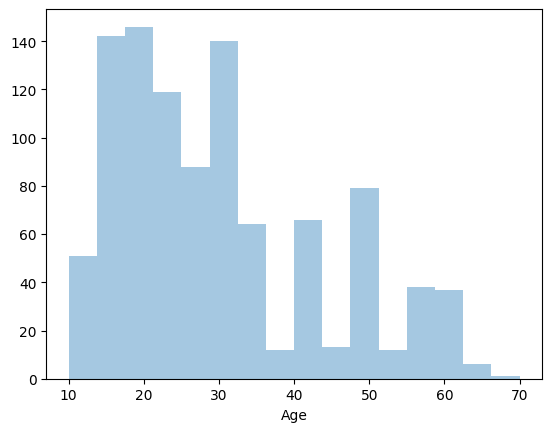

In [ ]:
sns_plot1=sns.distplot(data['Age'], kde=False)
sns_plot1.figure.savefig('Age.png')
sns_plot1

                                    Distribution of SystolicBP

<Axes: xlabel='SystolicBP'>

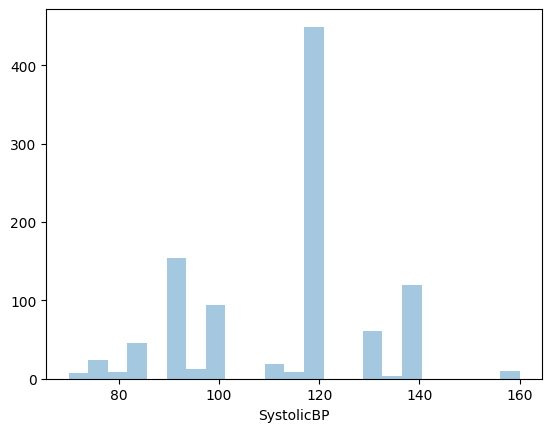

In [ ]:
sns_plot1=sns.distplot(data['SystolicBP'], kde=False)
sns_plot1.figure.savefig('Systolic.png')
sns_plot1

                                    Distribution of DiastolicBP

<Axes: xlabel='DiastolicBP'>

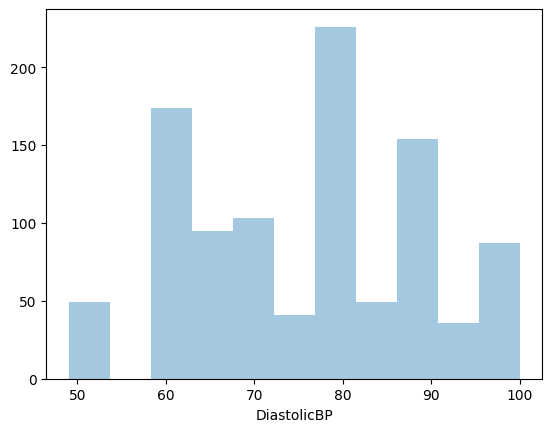

In [ ]:
sns_plot1=sns.distplot(data['DiastolicBP'], kde=False)
sns_plot1.figure.savefig('Diastolic.png')
sns_plot1

                                Checking the relationship between SystolicBP and Diastolic BP

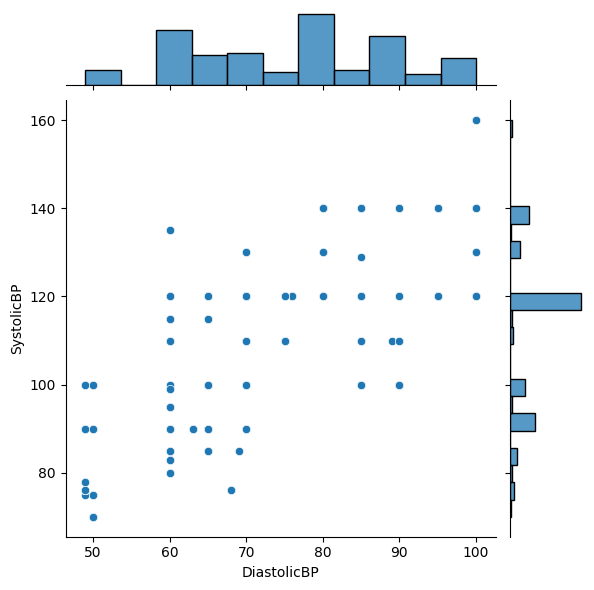

In [ ]:
sns_plot1=sns.jointplot(x='DiastolicBP',y='SystolicBP',data=data)
sns_plot1.figure.savefig('DiaSys.png')
sns_plot1

                            Visualizing the relationship between SystolicBP and HeartRate

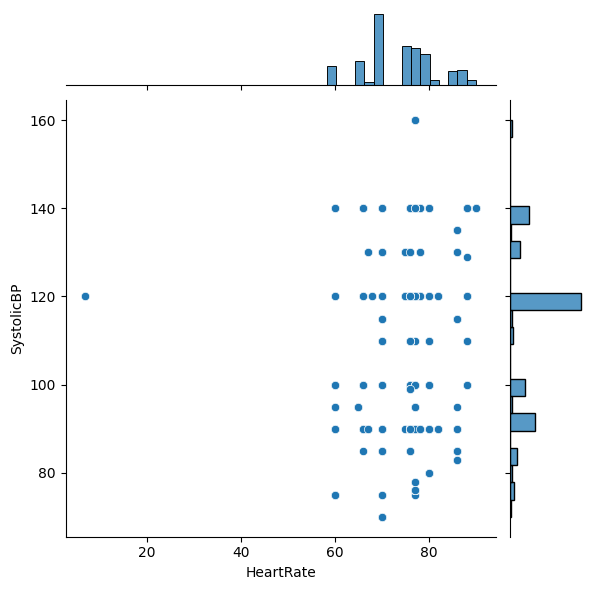

In [ ]:
sns_plot1=sns.jointplot(x='HeartRate',y='SystolicBP',data=data)
sns_plot1.figure.savefig('HeaSys.png')
sns_plot1

                            converting categorical variable into numeric

                Checking the correlation between features/variables

In [ ]:
data.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


<Axes: >

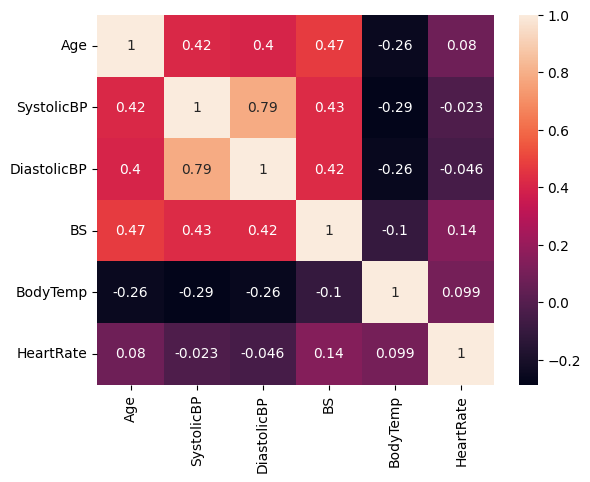

In [ ]:
#Visualizing the correlation with heatmap
sns_plot1=sns.heatmap(data.corr(),annot=True)
sns_plot1.figure.savefig('heatmap.png')
sns_plot1

#1).      Build and Fit a Linear Model

We'll be using 3 variables **(Age,BS,BodyTemp)** to predict the value of sytolicBP.
Here's why:

**Age:**
I chose age as one of the exploratory variable because it is a common risk factor for high blood pressure and has a strong correlation with systolic blood pressure in the given data.

**BS(BloodSugar):**
I chose BS because high blood sugar can increase blood pressure and has a strong correlation with systolic blood pressure in the given data

**BodyTemp:**
Blood pressure tends to be higher in cold weather due to the constriction of blood vessels as the body attempts to retain heat. It also has a fairly good correlation with the SystolicBP 


In [ ]:
#Chosing the exploratory variable
X=data[['Age','BS','BodyTemp','DiastolicBP']]#
y=data['SystolicBP']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)#Training the train data
predictions=lm.predict(X_test)

                                Evaluating Model

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
np.sqrt(mean_squared_error(predictions,y_test))

11.053606677638683

In [ ]:
mean_absolute_error(predictions,y_test)

9.333307861988047

#2).                Reducing the number of variable to 2 with the use of PCA

In [ ]:
#In order to reduce the number of variable by using pca,we need to scale our features/variables
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.drop('SystolicBP', axis=1)

# standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# apply PCA to the standardized data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)



In [ ]:
# create a new dataframe with the principal components and the target variable
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'SystolicBP': data['SystolicBP']
})

<Axes: xlabel='PC1', ylabel='PC2'>

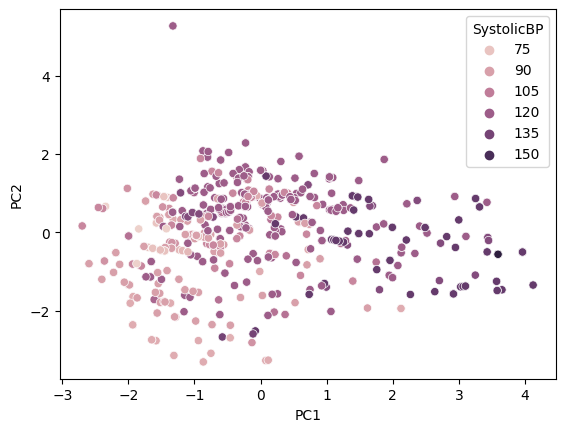

In [ ]:
# visualize the results with a scatter plot
import seaborn as sns
sns_plot1=sns.scatterplot(x='PC1', y='PC2', hue='SystolicBP', data=df_pca)
sns_plot1.figure.savefig('pca.png')
sns_plot1

In [ ]:
X.shape

(1014, 6)

In [ ]:
X_pca.shape  

(1014, 2)

WE HAVE SUCCESSFULLY REDUCED THE NUMBER OF VARIABLES TO 2

#3). Relationship between Heartrate and Age group

In [ ]:
#GROUPING THE AGE
bins=[10,14,19,41,71]
group=['10-14','14-19','19-41','41-71']
data['Age_Interval']=pd.cut(data['Age'],bins,labels=group)

In [ ]:
#Calculate the mean heart rate
mean_heart_rate = data.groupby('Age_Interval')['HeartRate'].mean()
mean_heart_rate

Age_Interval
10-14    70.220000
14-19    72.995556
19-41    75.115163
41-71    74.728972
Name: HeartRate, dtype: float64

<Axes: xlabel='Age_Interval', ylabel='HeartRate'>

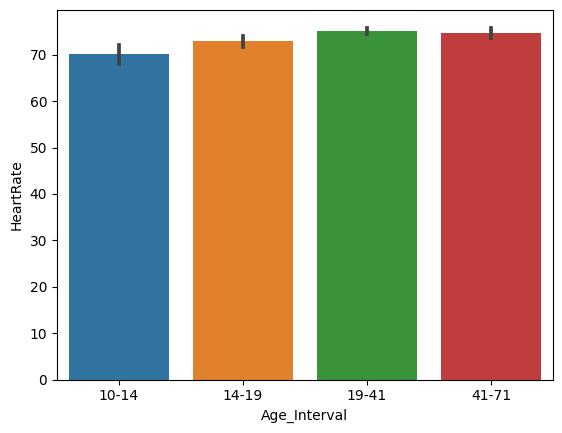

In [ ]:
sns_plot1=sns.barplot(x='Age_Interval', y='HeartRate', data=data)
sns_plot1.figure.savefig('Age_group.png')
sns_plot1

The resulting bar chart shows the mean heart rate for each age interval. The age interval were chosen based on adolescency i.e Age before adolescent,age at adolescent, adult age and older adult

#4). Investigating association between between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure.  

**High/High**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# create a dataframe with only systolic and diastolic blood pressure columns
bp_df = data[['SystolicBP', 'DiastolicBP']]

# create binary values for high systolic and diastolic blood pressure
bp_df['HighSystolicBP'] = bp_df['SystolicBP'].apply(lambda x: 1 if x >= 140 else 0)
bp_df['HighDiastolicBP'] = bp_df['DiastolicBP'].apply(lambda x: 1 if x >= 90 else 0)

# calculate frequent itemsets with a minimum support of 0.1
frequent_itemsets = apriori(bp_df[['HighDiastolicBP','HighSystolicBP']], min_support=0.1, use_colnames=True)

# generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# filter rules for high systolic and diastolic blood pressure
high_bp_rules = rules[(rules['antecedents'].apply(lambda x: 'HighSystolicBP' in x) & rules['consequents'].apply(lambda x: 'HighDiastolicBP' in x))]

# calculate support, confidence, conviction, and lift for high systolic and diastolic blood pressure
support = high_bp_rules['support'].values[0]
confidence = high_bp_rules['confidence'].values[0]
conviction = high_bp_rules['conviction'].values[0]
lift = high_bp_rules['lift'].values[0]

print("Support:", support)
print("Confidence:", confidence)
print("Conviction:", conviction)
print("Lift:", lift)

Support: 0.11538461538461539
Confidence: 0.9000000000000001
Conviction: 7.278106508875749
Lift: 3.306521739130435


**Normal/Normal**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# create a dataframe with only systolic and diastolic blood pressure columns
bp_df = data[['SystolicBP', 'DiastolicBP']]

# create binary values for high systolic and diastolic blood pressure
bp_df['NormalSystolicBP'] = bp_df['SystolicBP'].apply(lambda x: 1 if x in range(120,140) else 0)
bp_df['NormalDiastolicBP'] = bp_df['DiastolicBP'].apply(lambda x: 1 if x in range(80,90) else 0)

# calculate frequent itemsets with a minimum support of 0.1
frequent_itemsets = apriori(bp_df[['NormalDiastolicBP','NormalSystolicBP']], min_support=0.1, use_colnames=True)

# generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# filter rules for high systolic and diastolic blood pressure
high_bp_rules = rules[(rules['antecedents'].apply(lambda x: 'NormalSystolicBP' in x) & rules['consequents'].apply(lambda x: 'NormalDiastolicBP' in x))]

# calculate support, confidence, conviction, and lift for high systolic and diastolic blood pressure
support = high_bp_rules['support'].values[0]
confidence = high_bp_rules['confidence'].values[0]
conviction = high_bp_rules['conviction'].values[0]
lift = high_bp_rules['lift'].values[0]

print("Support:", support)
print("Confidence:", confidence)
print("Conviction:", conviction)
print("Lift:", lift)

Support: 0.24358974358974358
Confidence: 0.48148148148148145
Conviction: 1.4036348267117496
Lift: 1.7689210950080514


**Low/Low**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# create a dataframe with only systolic and diastolic blood pressure columns
bp_df = data[['SystolicBP', 'DiastolicBP']]

# create binary values for high systolic and diastolic blood pressure
bp_df['LowSystolicBP'] = bp_df['SystolicBP'].apply(lambda x: 1 if x in range(69,120) else 0)
bp_df['LowDiastolicBP'] = bp_df['DiastolicBP'].apply(lambda x: 1 if x in range(40,80) else 0)

# calculate frequent itemsets with a minimum support of 0.1
frequent_itemsets = apriori(bp_df[['LowDiastolicBP','LowSystolicBP']], min_support=0.1, use_colnames=True)

# generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# filter rules for high systolic and diastolic blood pressure
high_bp_rules = rules[(rules['antecedents'].apply(lambda x: 'LowSystolicBP' in x) & rules['consequents'].apply(lambda x: 'LowDiastolicBP' in x))]

# calculate support, confidence, conviction, and lift for high systolic and diastolic blood pressure
support = high_bp_rules['support'].values[0]
confidence = high_bp_rules['confidence'].values[0]
conviction = high_bp_rules['conviction'].values[0]
lift = high_bp_rules['lift'].values[0]

print("Support:", support)
print("Confidence:", confidence)
print("Conviction:", conviction)
print("Lift:", lift)

Support: 0.33826429980276135
Confidence: 0.9245283018867925
Conviction: 7.213017751479292
Lift: 2.0291595197255576


#5).                                                                                 Clustering the SystolicBP

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=2021)#2&2021
kmeans.fit(data[['SystolicBP']])
cluster_labels = kmeans.labels_
# Add the cluster labels to the patient data DataFrame
data["Cluster"] = cluster_labels

<Axes: xlabel='Age', ylabel='SystolicBP'>

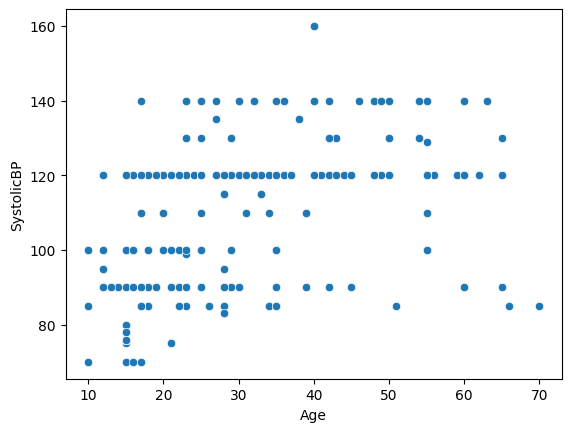

In [ ]:
#plot the clusters
sns.scatterplot(x='Age', y='SystolicBP', data=data)

In [ ]:
#Great,We are able to create clusters of patient with the similar systolicBP

#6). Correlation between Age and SystolicBP 


In [ ]:
# Extract age and systolic BP columns
age = data['Age']
systolic_bp = data['SystolicBP']

# Calculate mean and standard deviation of age and systolic BP
mean_age = np.mean(age)
std_age = np.std(age)
mean_systolic_bp = np.mean(systolic_bp)
std_systolic_bp = np.std(systolic_bp)

# Calculate deviations for age and systolic BP
dev_age = age - mean_age
dev_systolic_bp = systolic_bp - mean_systolic_bp

# Calculate correlation coefficient using Pearson's correlation formula
corr_coef = np.sum(dev_age * dev_systolic_bp) / (len(age) * std_age * std_systolic_bp)

print('Correlation coefficient between age and systolic BP:', corr_coef)

Correlation coefficient between age and systolic BP: 0.4160454479747329
